# **Examen Práctico**

Annette Pamela Ruiz Abreu - A01423595

La industria vinicola es una de las más importantes en el mundo, sin embargo, la calidad de un vino es subjetiva y depende de los gustos de cada persona. Existen diferentes tipos de vinos, entre ellos se encuentran los vinos tintos y los vinos blancos, los cuales tienen diferentes características que los hacen únicos. Algunas de las características que se buscan en un vino son: acidez, azúcar, cloruros, sulfatos, entre otros componentes químicos. Decidir la calidad de un vino es una tarea complicada, ya que depende de la percepción de cada persona, sin embargo, podemos tentar a resolver esta problematica al estudiar cúmulos de vinos con caracteristicas similares.

La problematica es encontrar cúmulos de vinos con características similares y determinar si existe una relación entre las características de los vinos y su calidad.


Preguntas de Investigación:
1. ¿Cuántos puntos conexos podemos identificar para darnos una idea de la cantidad de clusters que hay?
2. ¿Qué características químicas son las que más influyen en el agrupamiento del vino?
3. ¿Qué características químicas muestran la mayor variabilidad entre los diferentes grupos de vinos identificados?
4. ¿Existen combinaciones particulares de características químicas que tiendan a co-ocurrir en los vinos?
5. ¿Qué agrupaciones naturales de vinos pueden identificarse basándose en sus características químicas? 
6. ¿Cómo podemos nombrar o distinguir las agrupaciones? ¿Qué tipos de vinos están en la base de datos?
7. Teniendo las agrupaciones, ¿podemos determinar qué agrupación es "mejor" en términos económicos o de popularidad?




#### **Índice**

[0. Librerías](#id0)

[1. Preparación de Datos](#id1)

[1.1 Datos Nulos](#id1_1)

[1.2 Tipos de Datos](#id1_2)

[1.3 Datos Duplicados](#id1_3)

[1.4 Datos Atípicos](#id1_4)

[1.5 Normalización de Datos](#id1_5)

[2. Análisis de Datos](#id2)

[2.1 Complejos de Rips y Homología Persistente](#id2_1)

[2.2 Linkage Clustering](#id2_2)

[2.3 Gráficas de Dispersión](#id2_3)

[2.4 PCA](#id2_4)

[2.5 Mapper](#id2_5)

[3. Resultados y Conclusiones](#id3)



## **Metodología**

Para resolver las preguntas de investigación se empezará haciendo un complejo de Rips para ver cuántos puntos conexos podemos identificar para darnos una idea de la cantidad de clusters que podemos formar con los datos. 



<a id="id0"></a>

## 0. Librerías

In [563]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from scipy.spatial.distance import squareform, pdist 
import gudhi
from matplotlib import cm
import tadasets 
import ripser 
import persim
import plotly.graph_objects as go
from sklearn.manifold import Isomap
from persim import PersistenceImager
from scipy.cluster.hierarchy import linkage, dendrogram
from itertools import combinations
import warnings
from scipy.cluster.hierarchy import fcluster
import kmapper as km
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.manifold import TSNE



warnings.filterwarnings("ignore")
plt.rcParams.update(plt.rcParamsDefault)
np.random.seed(2002)


<a id="id1"></a>

## 1. Preparación de Datos

La base de datos se obtuvo de la siguiente fuente: https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering/data


In [564]:
data = pd.read_csv('wine-clustering.csv')
print("Tamaño de la base de datos: ", data.shape)
data.head()


Tamaño de la base de datos:  (178, 13)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Explicación de Atributos
* Alcohol: La cantidad de alcohol presente en el vino, típicamente expresada en porcentaje de volumen.
* Ácido málico: La cantidad de ácido málico presente en el vino, que afecta la acidez y el sabor.
* Ceniza: La cantidad de ceniza inorgánica presente en el vino después de la combustión.
* Alcalinidad de la ceniza: La medida de la alcalinidad de la ceniza en el vino, que puede afectar el sabor y la estabilidad del vino.
* Magnesio: La cantidad de magnesio presente en el vino, un mineral que puede influir en su sabor y calidad.
* Fenoles totales: La cantidad total de fenoles presentes en el vino, que pueden tener efectos antioxidantes y contribuir al sabor y aroma.
* Flavonoides: Compuestos fenólicos presentes en el vino que pueden influir en el color y el sabor.
* Fenoles no flavonoides: Otros compuestos fenólicos presentes en el vino que pueden tener efectos en el sabor y la calidad.
* Proantocianidinas: Un tipo específico de polifenoles presentes en el vino, asociados con beneficios para la salud y características organolépticas.
* Intensidad del color: La profundidad del color del vino, que puede variar según su composición química.
* Tono: La tonalidad del color del vino, que puede variar desde rojos violáceos hasta amarillos dorados.
* OD280/OD315 de vinos diluidos: Una relación óptica que puede proporcionar información sobre la concentración de compuestos fenólicos en el vino.
* Proline: Un aminoácido que puede estar presente en el vino y que puede influir en su sabor y aroma.

<a id="id1_1"></a>

### 1.1 Datos Nulos

Dado que no hay datos nulos, no se necesita realizar limpieza de datos.


In [565]:
print("Datos Nulos\n", data.isnull().sum())

Datos Nulos
 Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


<a id="id1_2"></a>

### 1.2 Tipos de Datos

In [566]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [567]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<a id="id1_3"></a>

### 1.3 Datos Duplicados

In [568]:
print("Hay {} duplicados en la base de datos".format(data.duplicated().sum()))

Hay 0 duplicados en la base de datos


<a id="id1_4"></a>

### 1.4 Datos Atípicos

Dado que no hay una cantidad exorbitante de datos atípicos, usaremos la base de datos completa para el análisis.


DIAGRAMA DE CAJA Y BIGOTE DE LOS DATOS PARA IDENTIFICAR DATOS ATÍPICOS


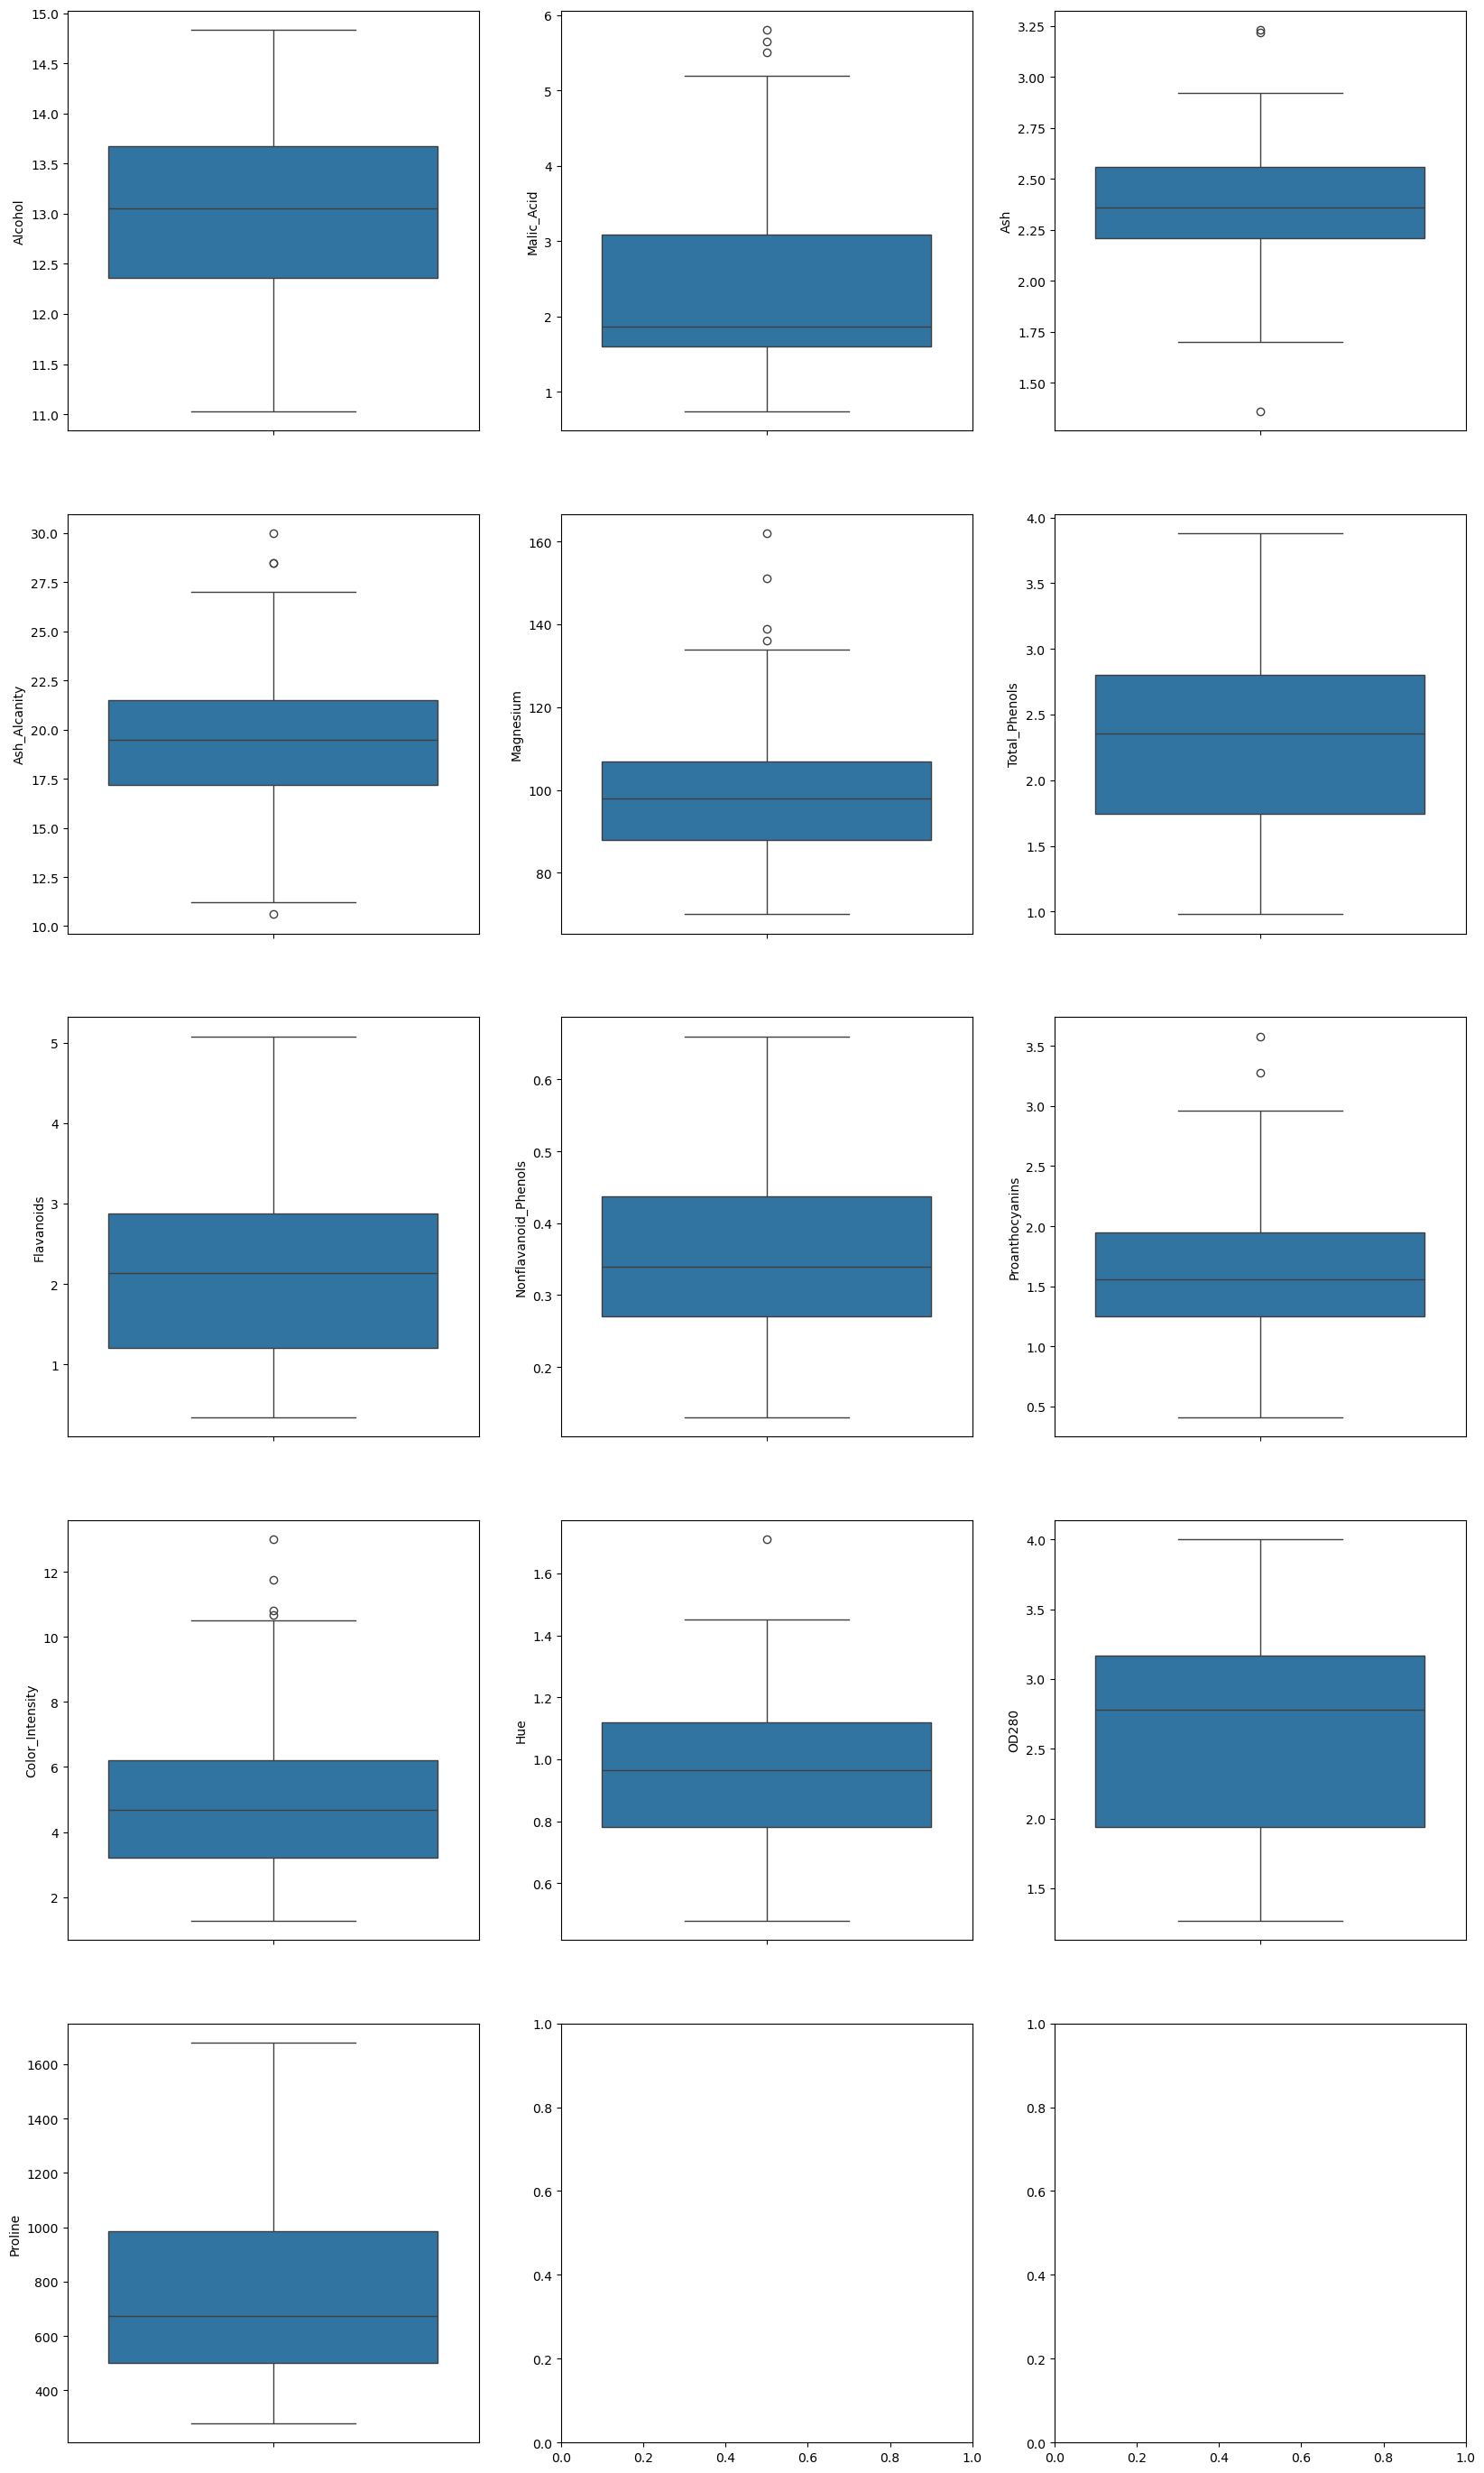

Tamaño de la base de datos sin datos atípicos:  (161, 13)


In [569]:
print("DIAGRAMA DE CAJA Y BIGOTE DE LOS DATOS PARA IDENTIFICAR DATOS ATÍPICOS")

# use a loop to itterate through columns and create boxplots. i want there to be 3 per row



fig, ax = plt.subplots(5, 3, figsize=(20, 35))
for variable, subplot in zip(data.columns, ax.flatten()):
    sns.boxplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

plt.show()


# create a loop to eliminate outliers from the data
no_outliers = data.copy()
for col in no_outliers.columns:
    q1 = no_outliers[col].quantile(0.25)
    q3 = no_outliers[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    no_outliers = no_outliers[(no_outliers[col] > lower_bound) & (no_outliers[col] < upper_bound)]

print("Tamaño de la base de datos sin datos atípicos: ",no_outliers.shape)



<a id="id1_5"></a>


### 1.5 Normalización de Datos

Dado que los datos están en diferentes escalas, es necesario normalizarlos para que tengan una media de 0 y una desviación estándar de 1. Esto es importante para que los algoritmos de agrupamiento funcionen correctamente.


In [570]:
# normalización de datos

escalador = MinMaxScaler()
datos_normalizados = escalador.fit_transform(data)
datos_normalizados = pd.DataFrame(datos_normalizados, columns=data.columns)
datos_normalizados.describe()




,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id="id1_6"></a>

### 1.6 Transformación de Datos

Para luego hacer otros análisis utilizando herramientas como el mapper, reduciremos la dimensionalidad de los datos utilizando isomap, que es un método de reducción de dimensionalidad no lineal.



In [571]:
isomap = Isomap(n_components=2)
projection_isomap = isomap.fit_transform(datos_normalizados)
projection_isomap = pd.DataFrame(projection_isomap, columns=['componente_1', 'componente_2'])
projection_isomap.head()

,componente_1,componente_2
0,-1.581466,-0.031019
1,-0.971940,0.430528
2,-1.763644,0.400274
3,-2.113840,0.328434
4,-1.023657,0.193300


<a id="id2"></a>


## 2. Análisis de Datos

<a id="id2_1"></a>


### 2.1 Complejo de Rips y Homología Persistente

In [572]:
def plot_rips_complex(data, R, label="data", col=1, maxdim=2):
    tab10 = cm.get_cmap('tab10')

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(label)
    ax.scatter(
        data[:, 0], data[:, 1], label=label,
        s=8, alpha=0.9, c=np.array(tab10([col] * len(data)))
    )

    for xy in data:
        ax.add_patch(mpatches.Circle(xy, radius=R, fc='none', ec=tab10(col), alpha=0.2))

    for i, xy in enumerate(data):
        if maxdim >=1:
            for j in range(i + 1, len(data)):
                pq = data[j]
                if (xy != pq).all() and (np.linalg.norm(xy - pq) <= R):
                    pts = np.array([xy, pq])
                    ax.plot(pts[:, 0], pts[:, 1], color=tab10(col), alpha=0.6, linewidth=1)
                if maxdim == 2:
                    for k in range(j + 1, len(data)):
                        ab = data[k]
                        if ((ab != pq).all()
                                and (np.linalg.norm(xy - pq) <= R)
                                and (np.linalg.norm(xy - ab) <= R)
                                and (np.linalg.norm(pq - ab) <= R)
                        ):
                            pts = np.array([xy, pq, ab])
                            ax.fill(pts[:, 0], pts[:, 1], facecolor=tab10(col), alpha=0.1)
                        pass

    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    pass

In [573]:

def homologia_persistente(simplex_tree):
    Barcodes_Rips = simplex_tree.persistence()
    gudhi.plot_persistence_diagram(Barcodes_Rips)
    plt.show()

    # ------------------------------

    comp_conex = [elem for elem in Barcodes_Rips if elem[0] == 0]
    print("Componentes Conexas:\n", comp_conex[:10])
    huecos = [elem for elem in Barcodes_Rips if elem[0] == 1]
    print("Huecos:\n", huecos[:10])
    esferas = [elem for elem in Barcodes_Rips if elem[0] == 2]
    print("Esferas:\n", esferas[:10])



    # ------------------------------


    dgm_X = ripser.ripser(X,maxdim=2)['dgms']
    persim.plot_diagrams(
        dgm_X, 
        show=True,
        title="Diagrama de persistencia"
    ) 


    # ------------------------------

    dmg0=dgm_X[0]
    Comp_Conexas = pd.DataFrame(dmg0, columns=['Birth', 'Death'])
    Comp_Conexas['Life'] = Comp_Conexas['Death'] - Comp_Conexas['Birth']
    Comp_Conexas = Comp_Conexas.sort_values(by='Life', ascending=False)
    s=pd.Series(range(0,1000))
    Comp_Conexas['Componente'] = s


    top_10_componentes = Comp_Conexas.head(10)[1:]
    top_10_componentes.plot.bar(x='Componente', y='Life', rot=0)
    plt.title('Vida de las diez principales componentes conexas')
    plt.xlabel('Componente')
    plt.ylabel('Duración de vida')
    plt.title('Vida de las componentes conexas')
    plt.show()




##### Adicional: Pruebas para visualizar todos los complejos de rips de cada combinación de columnas

In [574]:
# PRUEBAS PARA VISUALIZAR TODOS LOS COMPLEJOS RIPS DE CADA COMBINACIÓN DE COLUMNAS

"""
def pruebas_rips(d):
    dist = pd.DataFrame(squareform(pdist(d), "euclidean"), columns=data.index.values, index=data.index.values)
    # Máxima distancia
    print("Distancia máxima: ", dist.values.max())

    # ---------------------

    rips_complex = gudhi.RipsComplex(distance_matrix=dist.values, max_edge_length=2.1)
    # Generamos el árbol de complejos simpliciales e imprimimos la información
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
        repr(simplex_tree.num_simplices()) + ' simplices - ' + \
        repr(simplex_tree.num_vertices()) + ' vertices.'
    print(result_str)

    # ---------------------

    X=np.array(d)
    plot_rips_complex(X, R=0.18, label="X", maxdim=1)


def iteraciones(data):
    columns = data.columns.tolist()  # Obtener una lista de nombres de columnas
    for dim in range(1, len(columns) + 1):  # Para cada dimensión de 1 a la dimensión total
        for cols in combinations(columns, dim):  # Para cada combinación de columnas
            if len(cols) >= 2:  # Verificar que hay al menos dos columnas
                selected_data = data[list(cols)]  # Seleccionar las columnas por su nombre
                print("Columnas seleccionadas:", cols)
                # Aplicar Isomap
                isomap = Isomap(n_components=2)
                d = isomap.fit_transform(selected_data)
                pruebas_rips(d)

# Llamar a la función iteraciones con el DataFrame datos_normalizados
iteraciones(datos_normalizados)

"""

'\ndef pruebas_rips(d):\n    dist = pd.DataFrame(squareform(pdist(d), "euclidean"), columns=data.index.values, index=data.index.values)\n    # Máxima distancia\n    print("Distancia máxima: ", dist.values.max())\n\n    # ---------------------\n\n    rips_complex = gudhi.RipsComplex(distance_matrix=dist.values, max_edge_length=2.1)\n    # Generamos el árbol de complejos simpliciales e imprimimos la información\n    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)\n    result_str = \'Rips complex is of dimension \' + repr(simplex_tree.dimension()) + \' - \' +         repr(simplex_tree.num_simplices()) + \' simplices - \' +         repr(simplex_tree.num_vertices()) + \' vertices.\'\n    print(result_str)\n\n    # ---------------------\n\n    X=np.array(d)\n    plot_rips_complex(X, R=0.18, label="X", maxdim=1)\n\n\ndef iteraciones(data):\n    columns = data.columns.tolist()  # Obtener una lista de nombres de columnas\n    for dim in range(1, len(columns) + 1):  # Para cada 

#### 2.1.1 Complejo de Rips y Homología Persistente Datos Normalizados

Distancia máxima:  2.0180147072512775
Rips complex is of dimension 2 - 940107 simplices - 178 vertices.


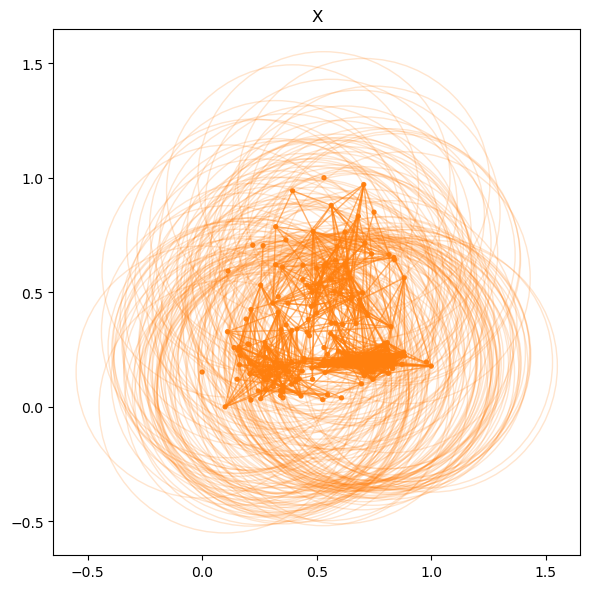

In [575]:
dist = pd.DataFrame(squareform(pdist(datos_normalizados), "euclidean"), columns=data.index.values, index=data.index.values)
# Máxima distancia
print("Distancia máxima: ", dist.values.max())

# ---------------------

rips_complex = gudhi.RipsComplex(distance_matrix=dist.values, max_edge_length=2.1)
# Generamos el árbol de complejos simpliciales e imprimimos la información
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)

# ---------------------

X=np.array(datos_normalizados)
plot_rips_complex(X, R=0.55, label="X", maxdim=1)



Aunque los datos son multidimensionales, podemos visualizarlos en un espacio de menor dimensión utilizando el complejo de Rips. El complejo de Rips es una forma de visualizar la topología de los datos en un espacio de menor dimensión. Nos permite identificar cúmulos de puntos que están cerca unos de otros en el espacio de datos original. En este caso, parece que podría haber 2 o 3 componentes conexas diferentes, lo que nos lleva a conlcuir que quizá haya 2 o 3 clusters o tipos de vinos diferentes; sin embargo, la visualización no es 100 % clara y en realidad parece como 1 componente conexa gigante (lo cual no nos ayuda porque queremos agrupar los datos).

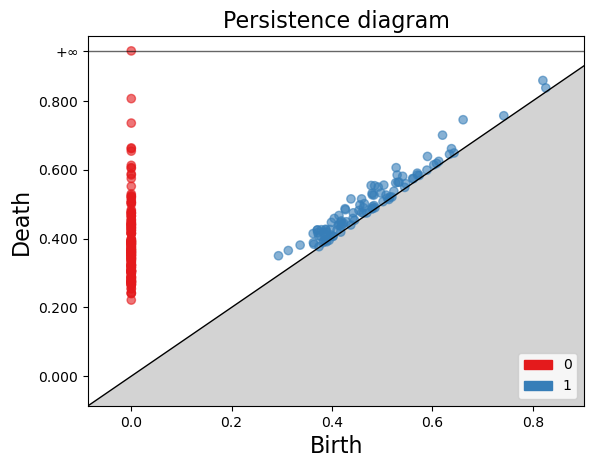

Componentes Conexas:
 [(0, (0.0, inf)), (0, (0.0, 0.8068044841884924)), (0, (0.0, 0.7356595058919788)), (0, (0.0, 0.6635745737585709)), (0, (0.0, 0.661181215084445)), (0, (0.0, 0.6541715001493942)), (0, (0.0, 0.6127684505672379)), (0, (0.0, 0.6061535576422159)), (0, (0.0, 0.6045343900229144)), (0, (0.0, 0.5876886843204362))]
Huecos:
 [(1, (0.661305460776694, 0.7453701168509437)), (1, (0.620261072197103, 0.7005417081758663)), (1, (0.5278075511991965, 0.6060372308464372)), (1, (0.437785382725661, 0.5152070390086698)), (1, (0.47794997488887336, 0.5542129824469559)), (1, (0.48499352463969114, 0.5535392455795356)), (1, (0.4260195046106886, 0.48674419051405005)), (1, (0.492154736554904, 0.5497706868793683)), (1, (0.4267213095232562, 0.4838489669944343)), (1, (0.2933687537551753, 0.3500093254120985))]
Esferas:
 []


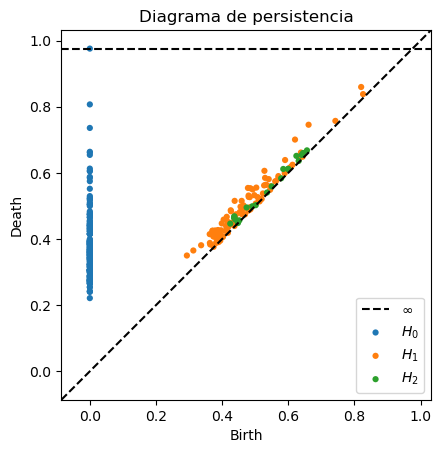

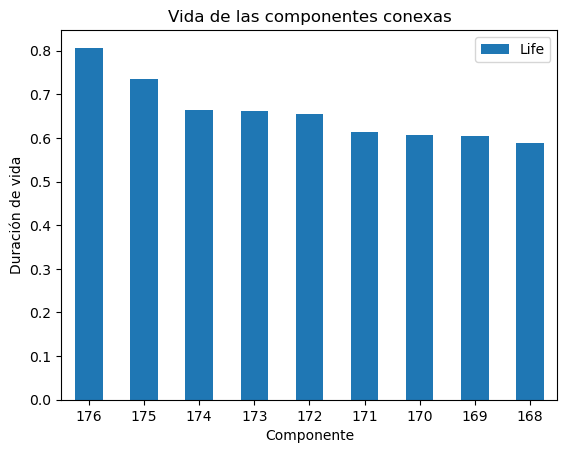

In [576]:
homologia_persistente(simplex_tree)

Al graficar la homología persistente podemos observar que no hay huecos ni esferas, solamente componentes conexas. En este caso, al analizar la duración de vida de cada componente (ignorando la infinita) parece que hay 1 componente conexa que persiste más que todas. Esto nos indica que esta forma de hacer el complejo no nos ayuda a distinguir agrupaciones.


#### 2.1.2 Complejo de Rips y Homología Persistente Datos Transformados

Distancia máxima:  4.86517299194306
Rips complex is of dimension 2 - 940107 simplices - 178 vertices.


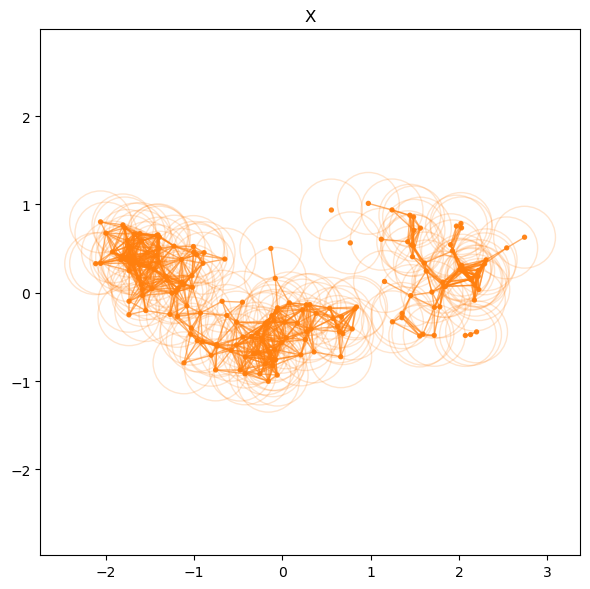

In [577]:
dist = pd.DataFrame(squareform(pdist(projection_isomap), "euclidean"), columns=data.index.values, index=data.index.values)
# Máxima distancia
print("Distancia máxima: ", dist.values.max())

# ---------------------

rips_complex = gudhi.RipsComplex(distance_matrix=dist.values, max_edge_length=5)
# Generamos el árbol de complejos simpliciales e imprimimos la información
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)

# ---------------------

X=np.array(projection_isomap)
plot_rips_complex(X, R=0.35, label="X", maxdim=1)



Al hacer el complejo de Rips con los datos transformados utilizando isomap, es muchísimo más evidente que hay 3 componentes conexas diferentes, indicando que hay 3 clusters distintos en los datos. Y también podemos ver que hay 2 clusters que están mucho más cerca uno del otro que el tercero y pueden llegar a conectarse dependiendo del epsilon que se elija para graficar.

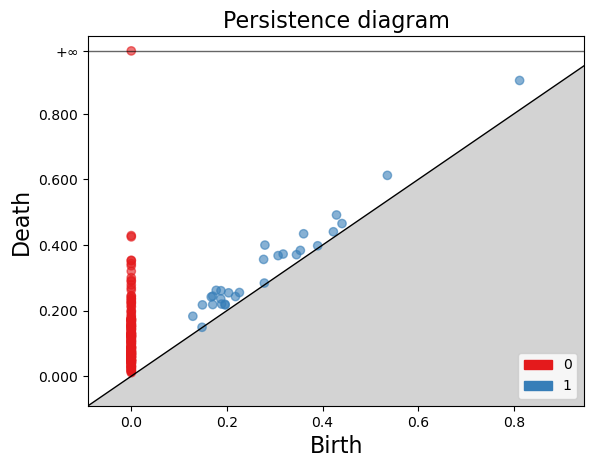

Componentes Conexas:
 [(0, (0.0, inf)), (0, (0.0, 0.4286700594589208)), (0, (0.0, 0.4247811079510015)), (0, (0.0, 0.3534974603295659)), (0, (0.0, 0.3520967409588928)), (0, (0.0, 0.3432678841056833)), (0, (0.0, 0.3366893022756843)), (0, (0.0, 0.31988394113404367)), (0, (0.0, 0.3003997353288952)), (0, (0.0, 0.2922939111720161))]
Huecos:
 [(1, (0.2794320019787642, 0.39976283709414334)), (1, (0.8119209456866113, 0.9017888820764883)), (1, (0.17755125717274464, 0.2617812987203591)), (1, (0.27669370816603167, 0.35608414182711584)), (1, (0.5354601954442721, 0.6123668557959178)), (1, (0.16722090097832487, 0.24162523364566113)), (1, (0.3603491294087246, 0.43425823653389106)), (1, (0.17021746313075195, 0.24408464689263776)), (1, (0.18747888683033376, 0.2606261726860474)), (1, (0.14874632295360268, 0.21737438975827864))]
Esferas:
 []


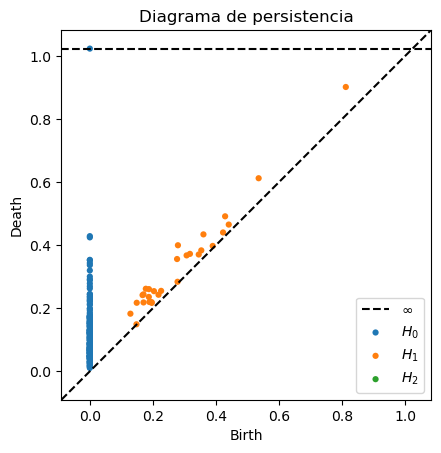

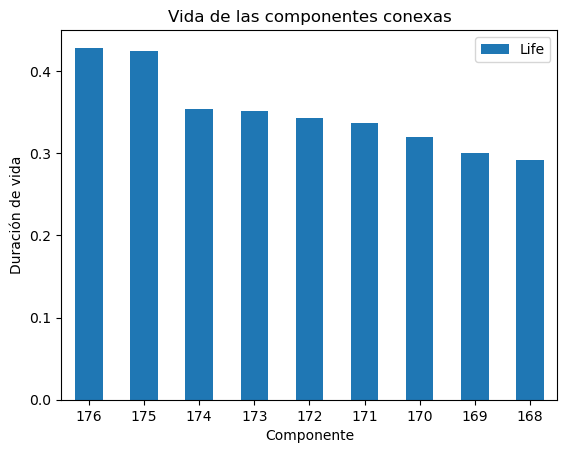

In [578]:
homologia_persistente(simplex_tree)

Al hacer los diagramas de persistencia del complejo de rips con los datos transformados, la vida de los componentes disminuye, pero ya podemos observar que hay 3 componentes que tienen vidas casi iguales, mientras que en el complejo de rips con los datos originales, había 2 componentes con vidas casi iguales. Esto nos permite visualizar mejor que sí hay 3 clusters distintos.

Al hacer varias pruebas con diferentes columnas y valores de epsilon, se encontró que los mejores resultados se obtienen usando las siguientes columnas:
* Alcohol
* Malic Acid
* Flavanoids
* OD280
* Ash_Alcanity
* Hue
* Magnesium
* Color_Intensity
* Proline


Esto significa que estas columnas son las que más influyen en el agrupamiento de los vinos. Al hacer el complejo de Rips con estas columnas, se observa que hay 3 componentes conexas distintas, lo que nos indica que hay 3 clusters diferentes en los datos.

Los datos que empeoraban las visualizaciones y hacían que la distinción de grupos no fuera clara eran:
* Nonflavanoid_Phenols
* Ash
* Total_Phenols
* Proanthocyanins


Es por ello que no utilizaremos estas columnas y nos quedaremos con la projección de isomap que solo utiliza los componentes químicos clave.



Distancia máxima:  3.730985493774503
Rips complex is of dimension 2 - 940107 simplices - 178 vertices.


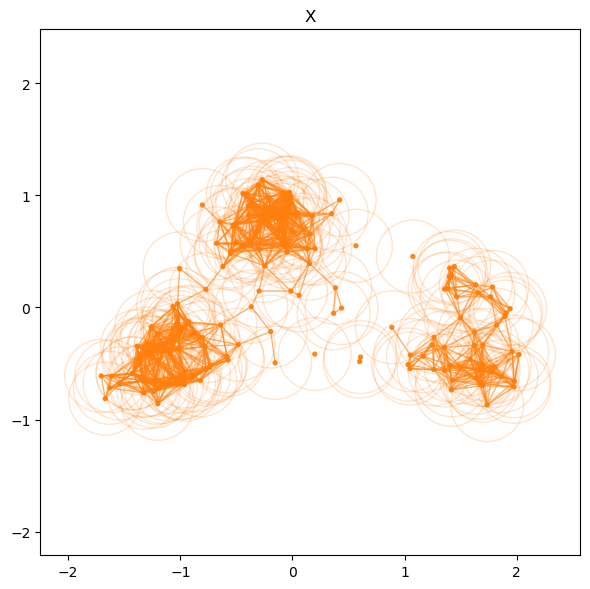

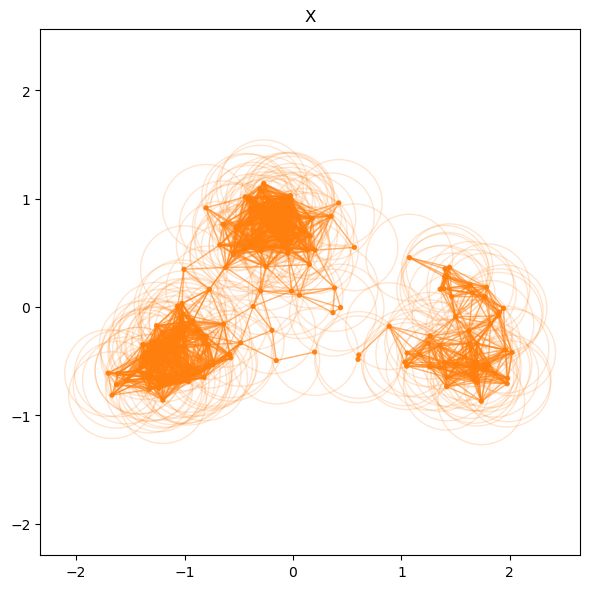

In [579]:
projection_isomap_perfecto = isomap.fit_transform(datos_normalizados[["Alcohol", "Malic_Acid", "Flavanoids", "OD280", "Ash_Alcanity", "Hue", "Magnesium", "Color_Intensity", "Proline"]])


dist = pd.DataFrame(squareform(pdist(projection_isomap_perfecto), "euclidean"), columns=data.index.values, index=data.index.values)
# Máxima distancia
print("Distancia máxima: ", dist.values.max())

# ---------------------

rips_complex = gudhi.RipsComplex(distance_matrix=dist.values, max_edge_length=5)
# Generamos el árbol de complejos simpliciales e imprimimos la información
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)

# ---------------------

X=np.array(projection_isomap_perfecto)
plot_rips_complex(X, R=0.325, label="X", maxdim=1)
plot_rips_complex(X, R=0.4, label="X", maxdim=1)



<a id="id2_2"></a>


### 2.2 Linkage Clustering

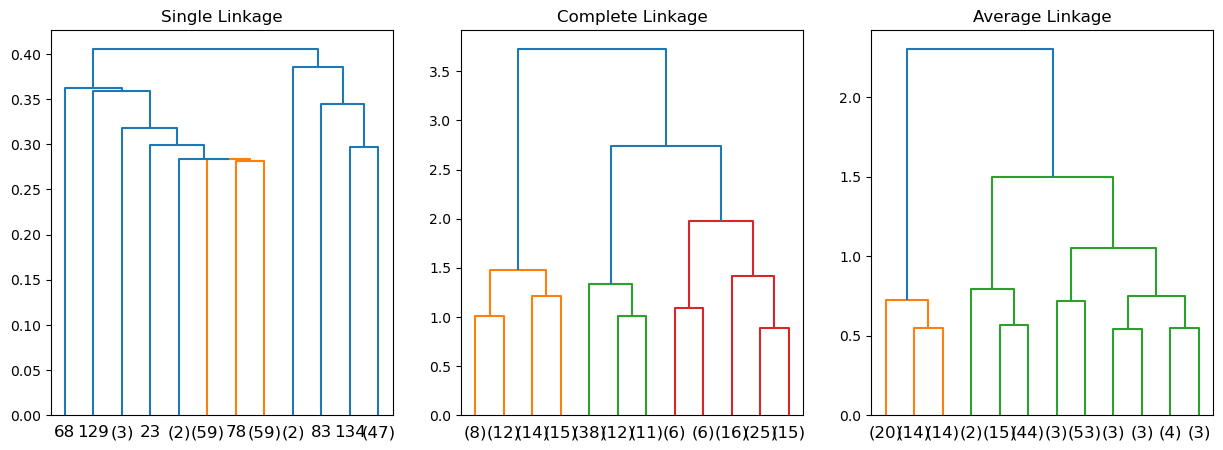

In [580]:
# Perform single linkage clustering
Z_single = linkage(X, method='single')

# Perform complete linkage clustering
Z_complete = linkage(X, method='complete')

# Perform average linkage clustering
Z_average = linkage(X, method='average')

# Plot dendrograms for different linkage methods
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
dendrogram(Z_single, truncate_mode='lastp', p=12)
plt.title('Single Linkage')

plt.subplot(1, 3, 2)
dendrogram(Z_complete, truncate_mode='lastp', p=12)
plt.title('Complete Linkage')

plt.subplot(1, 3, 3)
dendrogram(Z_average, truncate_mode='lastp', p=12)
plt.title('Average Linkage')

plt.show()


In [581]:
# ------- Single Linkage -------
# Definir un umbral de distancia
threshold = 0.4  # Ajusta este umbral según el dendrograma
# Asignar etiquetas de cluster utilizando fcluster
clusters = fcluster(Z_single, t=threshold, criterion='distance')
# Imprimir información sobre los clusters
num_clusters = len(set(clusters))
print(f"Número de clusters encontrados en Single Linkage: {num_clusters}")


# ------- Complete Linkage -------
# Definir un umbral de distancia
threshold = 2.5  # Ajusta este umbral según el dendrograma
# Asignar etiquetas de cluster utilizando fcluster
clusters = fcluster(Z_complete, t=threshold, criterion='distance')
# Imprimir información sobre los clusters
num_clusters = len(set(clusters))
print(f"Número de clusters encontrados en Complete Linkage: {num_clusters}")


# ------- Average Linkage -------
# Definir un umbral de distancia
threshold = 1.5  # Ajusta este umbral según el dendrograma
# Asignar etiquetas de cluster utilizando fcluster
clusters = fcluster(Z_average, t=threshold, criterion='distance')
# Imprimir información sobre los clusters
num_clusters = len(set(clusters))
print(f"Número de clusters encontrados en Average Linkage: {num_clusters}")



Número de clusters encontrados en Single Linkage: 2
Número de clusters encontrados en Complete Linkage: 3
Número de clusters encontrados en Average Linkage: 3


Al realizar métodos de clustering jerárquicos como el linkage clustering, se observa que cada método devuelve resultados de agrupaciones un poco distintas debido a que cada uno tiene un criterio diferente para unir los clusters: el enlace único utiliza la distancia más corta entre puntos de distintos clusters, el enlace completo la más larga, y el enlace promedio promedia todas las distancias entre los puntos.

Sin embargo, los tres métodos confirman la hipótesis inicial de que hay entre 2 y 3 clusters, en donde dos clusters están cercanos y pueden llegar a unirse (como se muestra en el Complete Linkage)


Nuevamente, podemos concluir que hay 3 clusters distintos en los datos.




<a id="id2_3"></a>


### 2.3 Gráficas de Dispersión

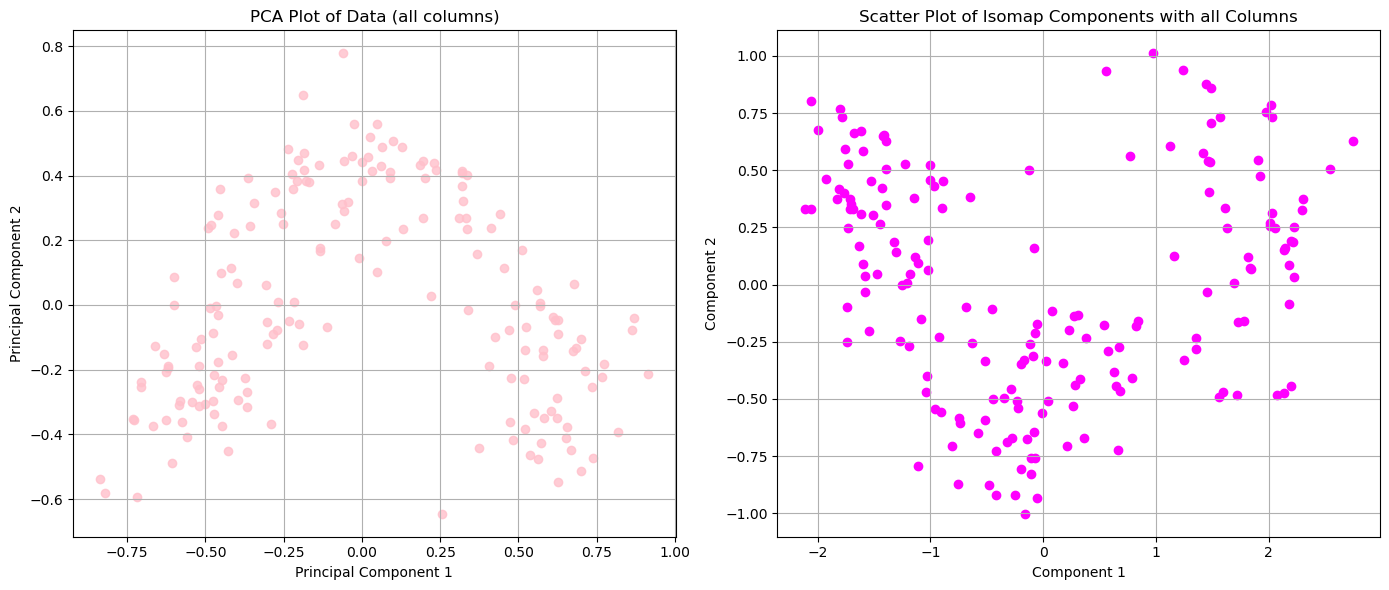

In [582]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(datos_normalizados)

# Scatter plot of PCA
plt.figure(figsize=(14, 6))  # Adjust the figure size as needed
plt.subplot(1, 2, 1)  # Create subplot 1 in a 1x2 grid
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8, color="pink")
plt.title('PCA Plot of Data (all columns)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Scatter plot of Isomap
X = np.array(projection_isomap)
plt.subplot(1, 2, 2)  # Create subplot 2 in a 1x2 grid
plt.scatter(X[:, 0], X[:, 1], color='magenta')
plt.title('Scatter Plot of Isomap Components with all Columns')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

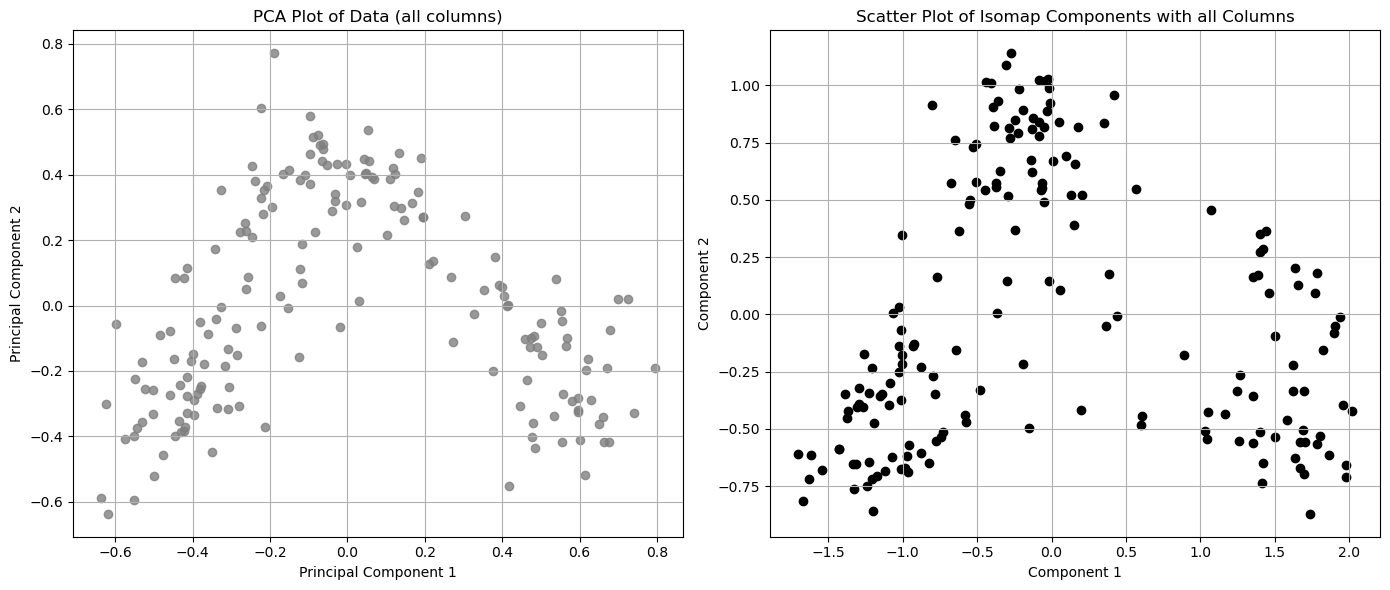

In [583]:
pca = PCA(n_components=2)
datos_normalizados_perfectos = datos_normalizados[["Alcohol", "Malic_Acid", "Flavanoids", "OD280", "Ash_Alcanity", "Hue", "Magnesium", "Color_Intensity", "Proline"]]


X_pca = pca.fit_transform(datos_normalizados_perfectos)



# Scatter plot of PCA
plt.figure(figsize=(14, 6))  # Adjust the figure size as needed
plt.subplot(1, 2, 1)  # Create subplot 1 in a 1x2 grid
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8, color="gray")
plt.title('PCA Plot of Data (all columns)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Scatter plot of Isomap
X = np.array(projection_isomap_perfecto)
plt.subplot(1, 2, 2)  # Create subplot 2 in a 1x2 grid
plt.scatter(X[:, 0], X[:, 1], color='black')
plt.title('Scatter Plot of Isomap Components with all Columns')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

<a id="id2_4"></a>


### 2.4 PCA
Se realizará un análisis de agrupamiento jerárquico sobre datos escalados y reducidos a tres dimensiones mediante análisis de componentes principales (PCA). Posteriormente, se visualizarán los clusters en un mapa bidimensional utilizando t-SNE para reducción adicional de dimensionalidad. Esta representación permitirá interpretar la distribución de las muestras y los centroides de los clusters, así como la relación entre los clusters y las muestras individuales.




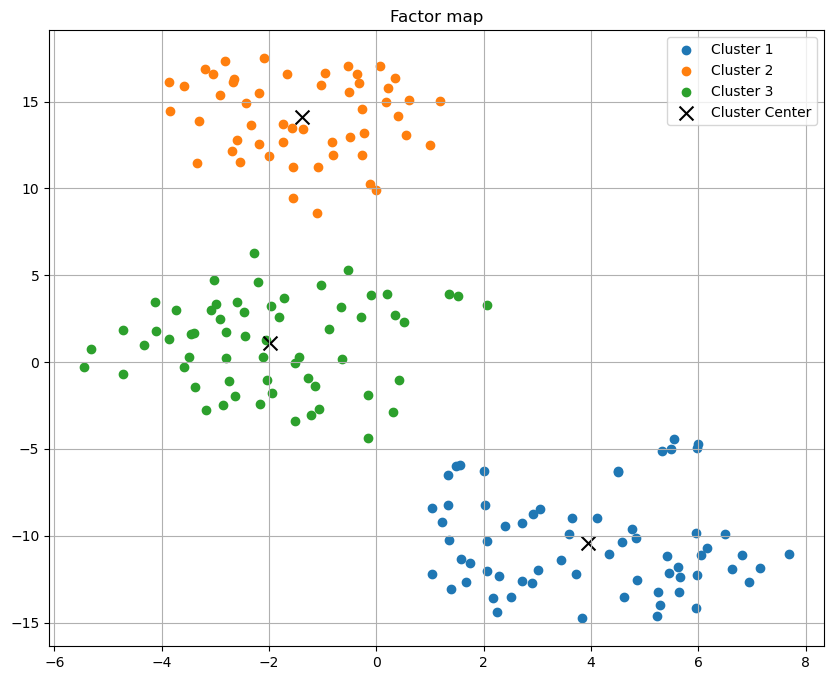

In [584]:
# Scale your data
scaler = StandardScaler()
datos_normalizados_perfectos_scaled = scaler.fit_transform(datos_normalizados_perfectos)

# PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(datos_normalizados_perfectos_scaled)

# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
hc_result = hc.fit_predict(pca_result)

# Plotting
plt.figure(figsize=(10, 8))

# Using TSNE for better visualization
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(pca_result)

# Plotting clusters
for i in range(len(np.unique(hc_result))):
    cluster_points = tsne_result[hc_result == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

# Plotting cluster centers
cluster_centers = []
for i in range(len(np.unique(hc_result))):
    cluster_points = tsne_result[hc_result == i]
    cluster_center = cluster_points.mean(axis=0)
    cluster_centers.append(cluster_center)
cluster_centers = np.array(cluster_centers)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='black', s=100, label='Cluster Center')

plt.title('Factor map')
plt.legend()
plt.grid(True)
plt.show()


<a id="id2_5"></a>


### 2.5 Mapper

Realizaremos el mapper con los datos que solo tienen las columnas que más influyen en el agrupamiento de los vinos.


#### 2.5.1 Mapper con KMeans

In [585]:
projection_isomap_perfecto = isomap.fit_transform(datos_normalizados_perfectos)
X = np.array(projection_isomap_perfecto)


In [586]:
mapper = km.KeplerMapper(verbose=1)
projected_data = mapper.fit_transform(X, projection=[0, 1]) 

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (178, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()



In [587]:
covering=km.Cover(n_cubes=7,perc_overlap=0.4)
covering

Cover(n_cubes=7, perc_overlap=0.4, limits=None, verbose=0)

In [588]:
G = mapper.map(X, datos_normalizados_perfectos, clusterer=sklearn.cluster.KMeans(n_clusters=3),cover=covering)

Mapping on data shaped (178, 9) using lens shaped (178, 2)

Creating 49 hypercubes.

Created 243 edges and 108 nodes in 0:00:00.124937.


In [589]:
mapper.visualize(G, 
                title='Mapper Vino',
                #custom_tooltips = performance_data['gender'].to_numpy(),
                color_values = datos_normalizados_perfectos["Alcohol"]+datos_normalizados_perfectos["Flavanoids"]+datos_normalizados_perfectos["OD280"]+datos_normalizados_perfectos["Proline"],
                color_function_name = 'Alochol',
                node_color_function=np.array(['average','std','sum','max','min']),
                path_html="mapper_vino_kmeans_preliminar.html")

Wrote visualization to: mapper_vino_kmeans_preliminar.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Mapper Vino | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weight:

Al realizar el mapper anterior, se observa que hay 2 componentes conexas distintas; sin embargo, hay un solo punto o nodo que conecta a dos espacios que de lo contrario se considerarían componentes conexas distintas, lo cual haría que hubiera 3 clusters diferentes. Esto se debe a la conclusión anterior en donde habíamos visto que dos clusters eran muy cercanos y dependiendo de la epsilon se pueden juntar en 1 sola componente conexa. Para arreglar esto se dedició eliminar ese punto que conectaba las componentes (este nodo solo tenía dos elementos del dataframe).



In [590]:
datos_normalizados_perfectos.loc[G['nodes']['cube15_cluster2']]

,Alcohol,Malic_Acid,Flavanoids,OD280,Ash_Alcanity,Hue,Magnesium,Color_Intensity,Proline
71,0.744737,0.152174,0.531646,0.692308,0.742268,0.715447,0.173913,0.179181,0.094151
76,0.526316,0.031621,0.356540,0.443223,0.278351,0.577236,0.173913,0.283276,0.081312
101,0.413158,0.118577,0.215190,0.549451,0.407216,0.455285,0.195652,0.099829,0.202568


In [591]:
datos_normalizados_2 = datos_normalizados_perfectos.drop([69, 96]).reset_index(drop=True)

In [592]:
projection_isomap_2 = isomap.fit_transform(datos_normalizados_2)
X_2 = np.array(projection_isomap_2)

In [593]:
mapper = km.KeplerMapper(verbose=1)
projected_data = mapper.fit_transform(X_2, projection=[0, 1]) 

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (176, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()



In [594]:
covering=km.Cover(n_cubes=6,perc_overlap=0.34) 


In [595]:
G2 = mapper.map(X_2, datos_normalizados_2, clusterer=sklearn.cluster.KMeans(n_clusters=3),cover=covering)

Mapping on data shaped (176, 9) using lens shaped (176, 2)

Creating 36 hypercubes.



Created 161 edges and 84 nodes in 0:00:00.186384.


In [596]:
mapper.visualize(G2, 
                title='Mapper Vino',
                #custom_tooltips = performance_data['gender'].to_numpy(),
                color_values = datos_normalizados_2["Alcohol"]+datos_normalizados_2["Flavanoids"]+datos_normalizados_2["OD280"]+datos_normalizados_2["Proline"],
                color_function_name = 'Alochol',
                node_color_function=np.array(['average']),
                path_html="mapper_vino_kmeans_final.html")

Wrote visualization to: mapper_vino_kmeans_final.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Mapper Vino | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weight:

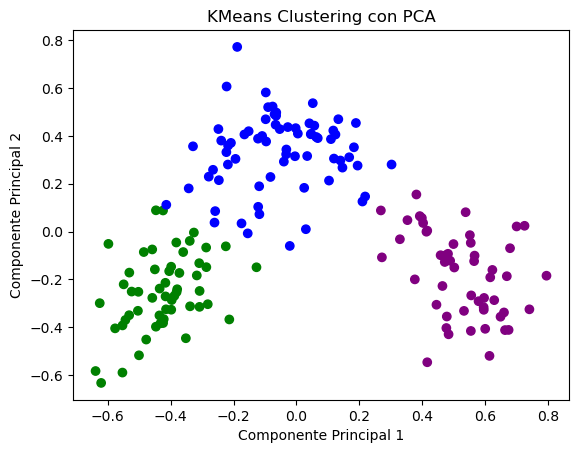

In [597]:
pca = PCA(n_components=2)
pca.fit(datos_normalizados_2)
datos_pca = pca.transform(datos_normalizados_2)

# colores
cluster_colors = {0: 'purple', 1: 'blue', 2: 'green'}

# Inicializa y ajusta el modelo KMeans
kmeans = sklearn.cluster.KMeans(n_clusters=3)
y = kmeans.fit_predict(datos_normalizados_2)

# Grafica los datos con colores correspondientes a los clusters
plt.scatter(datos_pca[:, 0], datos_pca[:, 1], c=[cluster_colors[cluster] for cluster in y])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('KMeans Clustering con PCA')
plt.show()

Con el código anterior, pudimos obtener un mapper y una gráfica del agrupamiento de los vinos. Para poder identificar qué tipos de vinos pertenecen a cada cluster, analizaremos cada cluster por separado.

In [616]:
grupo1 = ["cube17_cluster1", "cube24_cluster2", "cube18_cluster1", "cube23_cluster1", "cube22_cluster1", "cube28_cluster1", "cube27_cluster0"
          , "cube22_cluster2", "cube27_cluster1", "cube23_cluster0", "cube28_cluster0", "cube22_cluster0", "cube28_cluster2", "cube23_cluster2"
          , "cube29_cluster2", "cube30_cluster2", "cube24_cluster0", "cube29_cluster1", "cube30_cluster1", "cube25_cluster1", "cube29_cluster0"
          , "cube24_cluster1", "cube25_cluster0"]


lista_grupo1 = []

for i in grupo1:
    lista_grupo1.append(datos_normalizados.loc[G2['nodes'][i]])

grupo1 = pd.concat(lista_grupo1, ignore_index=True)
grupo1["cluster"] = "1"



In [617]:
print("Cantidad de nodos en el grupo 1:", grupo1.shape[0])
grupo1.describe()


Cantidad de nodos en el grupo 1: 91


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,0.527791,0.483886,0.580772,0.559080,0.314740,0.262903,0.111212,0.577234,0.240857,0.474009,0.189851,0.173208,0.244799
std,0.155018,0.238083,0.107364,0.124314,0.126406,0.138317,0.075280,0.244895,0.140901,0.225901,0.111549,0.147270,0.074137
min,0.207895,0.039526,0.336898,0.329897,0.086957,0.000000,0.000000,0.075472,0.003155,0.057167,0.000000,0.000000,0.097718
25%,0.401316,0.333004,0.513369,0.458763,0.206522,0.172414,0.050633,0.358491,0.141956,0.310580,0.093496,0.076923,0.194009
50%,0.507895,0.498024,0.545455,0.536082,0.304348,0.231034,0.097046,0.584906,0.217666,0.392491,0.178862,0.153846,0.251070
75%,0.647368,0.622530,0.671123,0.690722,0.396739,0.344828,0.160338,0.754717,0.304416,0.624573,0.247967,0.238095,0.288516
max,0.871053,0.970356,0.802139,0.845361,0.576087,0.627586,0.297468,0.943396,0.722397,1.000000,0.674797,0.754579,0.429387


In [618]:
grupo2 = ["cube12_cluster2", "cube19_cluster2", "cube13_cluster0", "cube8_cluster0", "cube20_cluster0", "cube14_cluster1"
          , "cube20_cluster2", "cube9_cluster2", "cube7_cluster1", "cube14_cluster0", "cube21_cluster1", "cube8_cluster1", "cube15_cluster2"
          , "cube21_cluster0", "cube8_cluster2", "cube9_cluster0", "cube15_cluster1", "cube14_cluster2", "cube19_cluster1", "cube13_cluster1"
          , "cube12_cluster1", "cube20_cluster1", "cube21_cluster2"]


lista_grupo2 = []

for i in grupo2:
    lista_grupo2.append(datos_normalizados.loc[G2['nodes'][i]])

grupo2 = pd.concat(lista_grupo2, ignore_index=True)
grupo2["cluster"] = "2"



In [619]:
print("Cantidad de nodos en el grupo 2:", grupo2.shape[0])
grupo2.describe()

Cantidad de nodos en el grupo 2: 90


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.336023,0.209113,0.498039,0.489118,0.263647,0.487395,0.414323,0.403564,0.430459,0.174479,0.470551,0.601140,0.182763
std,0.133744,0.179088,0.167026,0.142142,0.171140,0.203017,0.154475,0.232528,0.158361,0.083910,0.146625,0.159152,0.119232
min,0.100000,0.000000,0.181818,0.216495,0.000000,0.137931,0.137131,0.000000,0.100946,0.000000,0.170732,0.271062,0.000000
25%,0.247368,0.084980,0.407754,0.407216,0.173913,0.334483,0.316983,0.245283,0.331230,0.113055,0.384146,0.500000,0.101284
50%,0.348684,0.154150,0.497326,0.484536,0.206522,0.496552,0.387131,0.358491,0.391167,0.151024,0.467480,0.619048,0.154779
75%,0.392105,0.272727,0.588235,0.561856,0.312500,0.637931,0.487342,0.561321,0.485804,0.226749,0.577236,0.707875,0.250178
max,0.744737,1.000000,1.000000,0.922680,1.000000,0.875862,1.000000,1.000000,1.000000,0.402730,0.788618,0.934066,0.525678


In [620]:
grupo3 = ["cube1_cluster2", "cube2_cluster2", "cube6_cluster0", "cube7_cluster0", "cube5_cluster2"
          
          , "cube13_cluster2", "cube7_cluster2", "cube2_cluster0", "cube6_cluster1", "cube5_cluster0", "cube1_cluster1"
          , "cube2_cluster1", "cube6_cluster2", "cube1_cluster0", "cube0_cluster2", "cube5_cluster1", "cube0_cluster1", "cube4_cluster0"
          , "cube10_cluster1", "cube4_cluster1", "cube11_cluster1", "cube0_cluster0"]


lista_grupo3 = []

for i in grupo3:
    lista_grupo3.append(datos_normalizados.loc[G2['nodes'][i]])

grupo3 = pd.concat(lista_grupo3, ignore_index=True)
grupo3["cluster"] = "3"



In [621]:
print("Cantidad de nodos en el grupo 3:", grupo3.shape[0])
grupo3.describe()

Cantidad de nodos en el grupo 3: 125


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,0.674042,0.269043,0.563850,0.343464,0.387913,0.621793,0.537333,0.296755,0.465009,0.338594,0.456533,0.677333,0.545700
std,0.165697,0.159332,0.136610,0.138893,0.125136,0.142752,0.101543,0.136214,0.134427,0.107240,0.096694,0.139657,0.181147
min,0.110526,0.049407,0.181818,0.030928,0.086957,0.041379,0.143460,0.075472,0.170347,0.116894,0.260163,0.201465,0.047789
25%,0.592105,0.183794,0.475936,0.278351,0.293478,0.558621,0.493671,0.207547,0.365931,0.259386,0.357724,0.586081,0.422254
50%,0.686842,0.203557,0.550802,0.329897,0.358696,0.627586,0.548523,0.283019,0.476341,0.334471,0.455285,0.695971,0.557775
75%,0.797368,0.258893,0.657754,0.422680,0.489130,0.696552,0.601266,0.358491,0.545741,0.402730,0.520325,0.772894,0.700428
max,1.000000,0.652174,0.994652,0.742268,0.717391,1.000000,0.757384,0.698113,0.804416,0.650171,0.650407,1.000000,1.000000


In [622]:
all_data = pd.concat([grupo1, grupo2, grupo3], ignore_index=True)
all_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,0.531132,0.315308,0.549526,0.450424,0.329604,0.475535,0.374431,0.411580,0.388188,0.330595,0.381349,0.505004,0.349470
std,0.207556,0.221563,0.142432,0.164170,0.149569,0.219671,0.211766,0.233727,0.173047,0.187465,0.171325,0.263562,0.215318
min,0.100000,0.000000,0.181818,0.030928,0.000000,0.000000,0.000000,0.000000,0.003155,0.000000,0.000000,0.000000,0.000000
25%,0.352632,0.168478,0.465241,0.329897,0.206522,0.282759,0.191983,0.245283,0.264984,0.196672,0.254065,0.267399,0.172611
50%,0.543421,0.215415,0.540107,0.432990,0.304348,0.506897,0.407173,0.358491,0.381703,0.308874,0.390244,0.575092,0.286733
75%,0.683553,0.477767,0.641711,0.536082,0.413043,0.644828,0.548523,0.566038,0.495268,0.402730,0.518293,0.709707,0.539943
max,1.000000,1.000000,1.000000,0.922680,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.788618,1.000000,1.000000


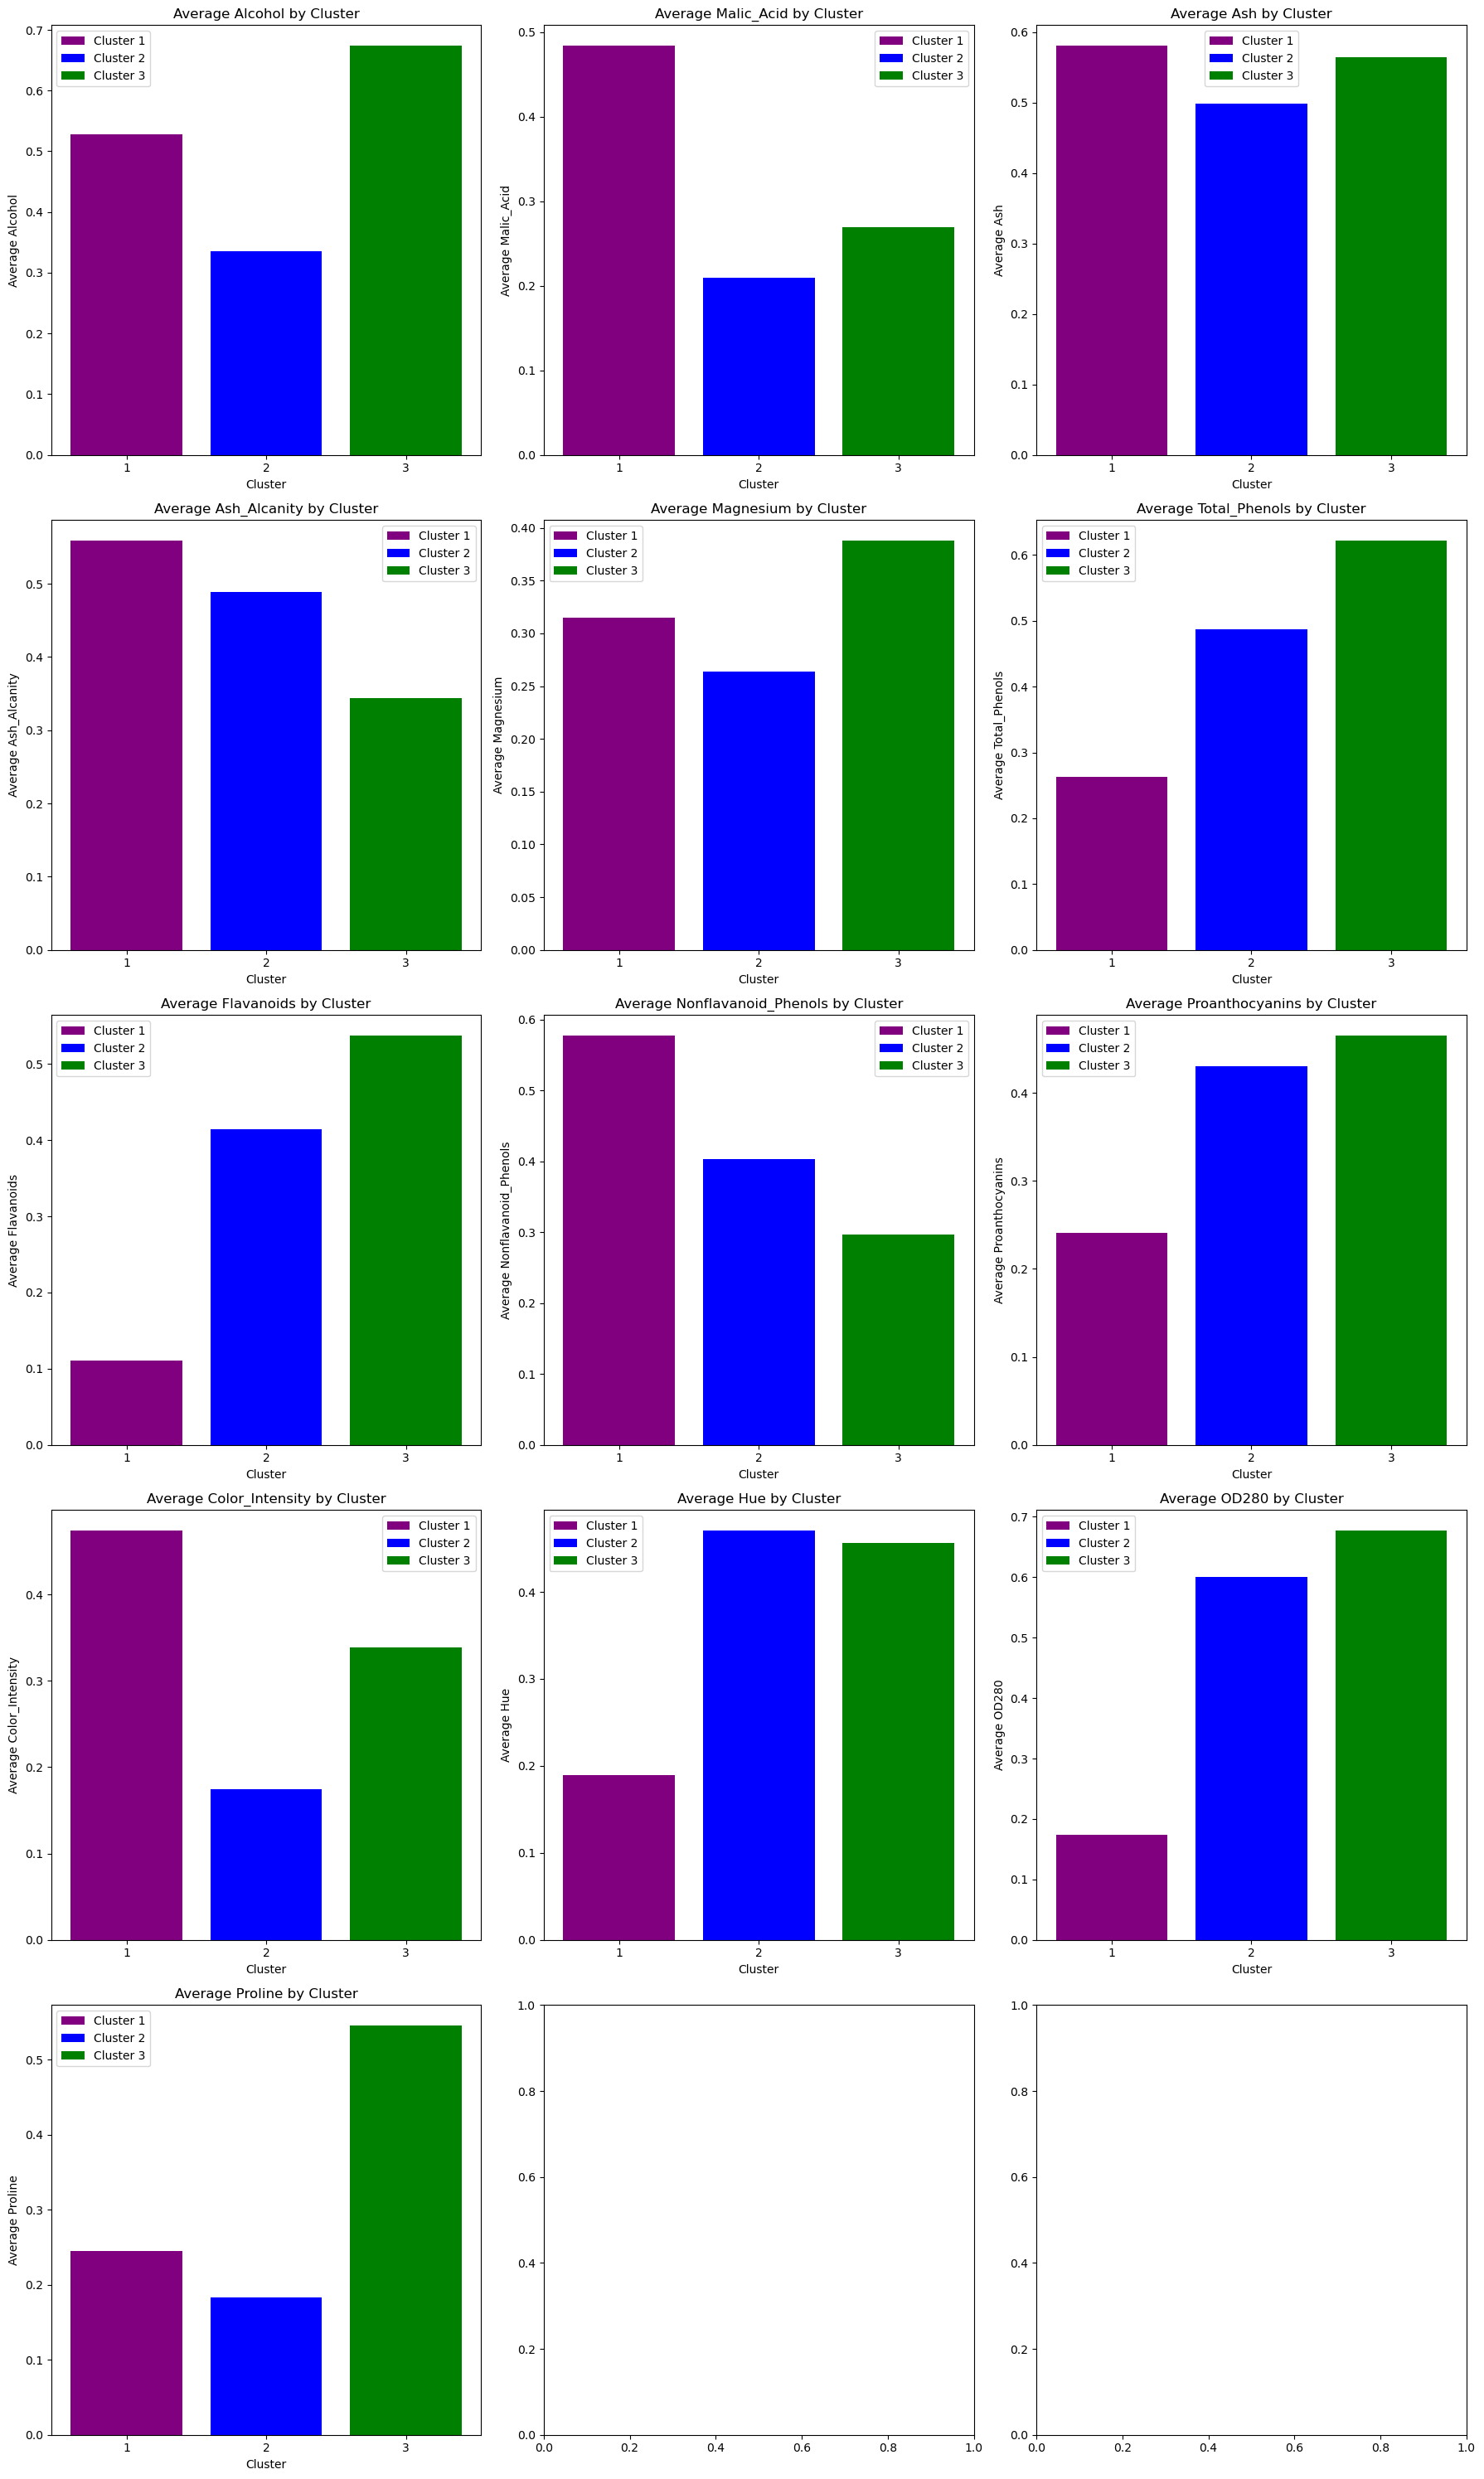

In [627]:
# Get unique clusters
clusters = all_data['cluster'].unique()

# Get the number of columns for subplots
num_columns = len(all_data.columns) - 1  # Excluding 'cluster' column
num_rows = -(-num_columns // 3)  # Ceiling division to get the number of rows needed

# colors
cluster_colors = {'Cluster 1': 'purple', 'Cluster 2': 'blue', 'Cluster 3': 'green'}

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6*num_rows))

# Flatten axes if only one row
if num_rows == 1:
    axes = [axes]

# Iterate over each column (excluding 'cluster') and create separate bar plots for each
for idx, column in enumerate(all_data.columns):
    if column != 'cluster':
        # Calculate subplot position
        row_idx = idx // 3
        col_idx = idx % 3
        
        # Iterate over each cluster
        for cluster in clusters:
            # Filter data for the current cluster
            cluster_data = all_data[all_data['cluster'] == cluster]
            
            # Calculate the average value of the current column within the cluster
            avg_value = cluster_data[column].mean()
            
            # Plot the average value for the current cluster
            axes[row_idx][col_idx].bar(cluster, avg_value, label=f'Cluster {cluster}', color=cluster_colors[f'Cluster {cluster}'])
        
        # Add labels and title for the subplot
        axes[row_idx][col_idx].set_xlabel('Cluster')
        axes[row_idx][col_idx].set_ylabel('Average ' + column)
        axes[row_idx][col_idx].set_title(f'Average {column} by Cluster')
        axes[row_idx][col_idx].legend()

# Adjust layout
plt.tight_layout()
# Show plots
plt.show()


#### 2.5.2 Mapper con DBSCAN

In [606]:
G = mapper.map(X, datos_normalizados_perfectos, clusterer=sklearn.cluster.DBSCAN(eps=0.4, min_samples=4),cover=covering)

Mapping on data shaped (178, 9) using lens shaped (178, 2)

Creating 36 hypercubes.

Created 41 edges and 21 nodes in 0:00:00.026182.


In [607]:
mapper.visualize(G, 
                title='Mapper Vino',
                #custom_tooltips = performance_data['gender'].to_numpy(),
                color_values = datos_normalizados_perfectos["Alcohol"]+datos_normalizados_perfectos["Flavanoids"]+datos_normalizados_perfectos["OD280"]+datos_normalizados_perfectos["Proline"],
                color_function_name = 'Alcohol+Flavanoids+OD280+Proline',
                node_color_function=np.array(['average','std','sum','max','min']),
                path_html="mapper_vino_dbscan_final.html")

Wrote visualization to: mapper_vino_dbscan_final.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Mapper Vino | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weight:

In [628]:
grupo1 = ["cube25_cluster0", "cube30_cluster0", "cube24_cluster0", "cube29_cluster0", "cube28_cluster0"
        , "cube23_cluster0", "cube27_cluster0", "cube22_cluster0"]


lista_grupo1 = []

for i in grupo1:
    lista_grupo1.append(datos_normalizados.loc[G2['nodes'][i]])

grupo1 = pd.concat(lista_grupo1, ignore_index=True)
grupo1["cluster"] = "1"



In [629]:
print("Cantidad de nodos en el grupo 1:", grupo1.shape[0])
grupo1.describe()

Cantidad de nodos en el grupo 1: 33


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,0.542185,0.483830,0.602009,0.570447,0.297760,0.292999,0.109960,0.624929,0.238314,0.438618,0.226657,0.177600,0.240587
std,0.152927,0.234863,0.101929,0.123211,0.125146,0.126825,0.077837,0.225320,0.138022,0.207647,0.126258,0.130526,0.060239
min,0.265789,0.077075,0.443850,0.355670,0.086957,0.110345,0.027426,0.150943,0.044164,0.078498,0.056911,0.000000,0.104850
25%,0.394737,0.363636,0.529412,0.484536,0.195652,0.196552,0.046414,0.490566,0.148265,0.283276,0.154472,0.087912,0.194009
50%,0.602632,0.494071,0.614973,0.536082,0.282609,0.282759,0.097046,0.698113,0.198738,0.377133,0.219512,0.194139,0.243937
75%,0.655263,0.624506,0.684492,0.690722,0.380435,0.351724,0.160338,0.754717,0.296530,0.609215,0.268293,0.238095,0.286733
max,0.871053,0.942688,0.802139,0.768041,0.576087,0.627586,0.297468,0.943396,0.722397,1.000000,0.674797,0.531136,0.336662


In [630]:
grupo2 = ["cube9_cluster0", "cube15_cluster0", "cube14_cluster0", "cube20_cluster0", "cube8_cluster0", "cube7_cluster0", "cube13_cluster0"]


lista_grupo2 = []

for i in grupo2:
    lista_grupo2.append(datos_normalizados.loc[G['nodes'][i]])

grupo2 = pd.concat(lista_grupo2, ignore_index=True)
grupo2["cluster"] = "2"


In [631]:
print("Cantidad de nodos en el grupo 2:", grupo2.shape[0])
grupo2.describe()

Cantidad de nodos en el grupo 2: 100


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.323789,0.179012,0.451390,0.482629,0.202609,0.442138,0.379578,0.422453,0.375584,0.156638,0.482683,0.593150,0.147910
std,0.108805,0.129139,0.135605,0.129137,0.088931,0.181930,0.111300,0.209691,0.124532,0.078986,0.138207,0.148238,0.094837
min,0.100000,0.000000,0.181818,0.226804,0.000000,0.137931,0.191983,0.000000,0.170347,0.000000,0.170732,0.289377,0.000000
25%,0.255263,0.083004,0.340909,0.386598,0.160326,0.331897,0.297468,0.264151,0.296530,0.104096,0.382114,0.498168,0.080064
50%,0.331579,0.156126,0.465241,0.463918,0.184783,0.420690,0.357595,0.396226,0.353312,0.139932,0.471545,0.619048,0.144080
75%,0.373684,0.225296,0.509358,0.563144,0.260870,0.541379,0.445148,0.547170,0.460568,0.200939,0.601626,0.699634,0.202568
max,0.647368,0.703557,0.834225,0.922680,0.456522,0.875862,0.719409,1.000000,0.757098,0.343003,0.788618,0.842491,0.433666


In [632]:
grupo3 = ["cube2_cluster0", "cube6_cluster0", "cube5_cluster0", "cube1_cluster0", "cube4_cluster0", "cube0_cluster0"]


lista_grupo3 = []

for i in grupo3:
    lista_grupo3.append(datos_normalizados.loc[G['nodes'][i]])

grupo3 = pd.concat(lista_grupo3, ignore_index=True)
grupo3["cluster"] = "3"


In [633]:
print("Cantidad de nodos en el grupo 3:", grupo3.shape[0])
grupo3.describe()

Cantidad de nodos en el grupo 3: 112


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,0.708059,0.261205,0.575201,0.339286,0.394798,0.643565,0.556265,0.300876,0.472482,0.358598,0.461310,0.682136,0.586541
std,0.117200,0.145648,0.123069,0.131987,0.114988,0.115119,0.080794,0.131768,0.130684,0.101207,0.092258,0.125245,0.147969
min,0.500000,0.120553,0.363636,0.030928,0.206522,0.420690,0.390295,0.075472,0.264984,0.191126,0.276423,0.454212,0.286733
25%,0.615132,0.185771,0.491979,0.278351,0.304348,0.561207,0.493671,0.240566,0.391167,0.274744,0.382114,0.584249,0.504280
50%,0.706579,0.202569,0.564171,0.324742,0.364130,0.644828,0.556962,0.292453,0.476341,0.351536,0.459350,0.657509,0.577389
75%,0.797368,0.243083,0.668449,0.423969,0.491848,0.696552,0.611814,0.358491,0.548896,0.419795,0.520325,0.772894,0.707561
max,1.000000,0.652174,0.994652,0.742268,0.673913,1.000000,0.757384,0.698113,0.804416,0.650171,0.650407,1.000000,1.000000


In [634]:
all_data = pd.concat([grupo1, grupo2, grupo3], ignore_index=True)
all_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,0.528872,0.257643,0.528277,0.428929,0.303283,0.514131,0.424033,0.394147,0.401391,0.286944,0.438427,0.577858,0.360910
std,0.214752,0.181961,0.141005,0.155760,0.138853,0.194923,0.175975,0.209576,0.150829,0.158974,0.144295,0.212228,0.240843
min,0.100000,0.000000,0.181818,0.030928,0.000000,0.110345,0.027426,0.000000,0.044164,0.000000,0.056911,0.000000,0.000000
25%,0.352632,0.156126,0.443850,0.319588,0.195652,0.386207,0.316456,0.245283,0.296530,0.151024,0.341463,0.505495,0.158345
50%,0.547368,0.195652,0.513369,0.427835,0.293478,0.524138,0.457806,0.339623,0.384858,0.274744,0.455285,0.600733,0.286733
75%,0.697368,0.320158,0.631016,0.536082,0.402174,0.655172,0.561181,0.509434,0.495268,0.377133,0.520325,0.728938,0.561341
max,1.000000,0.942688,0.994652,0.922680,0.673913,1.000000,0.757384,1.000000,0.804416,1.000000,0.788618,1.000000,1.000000


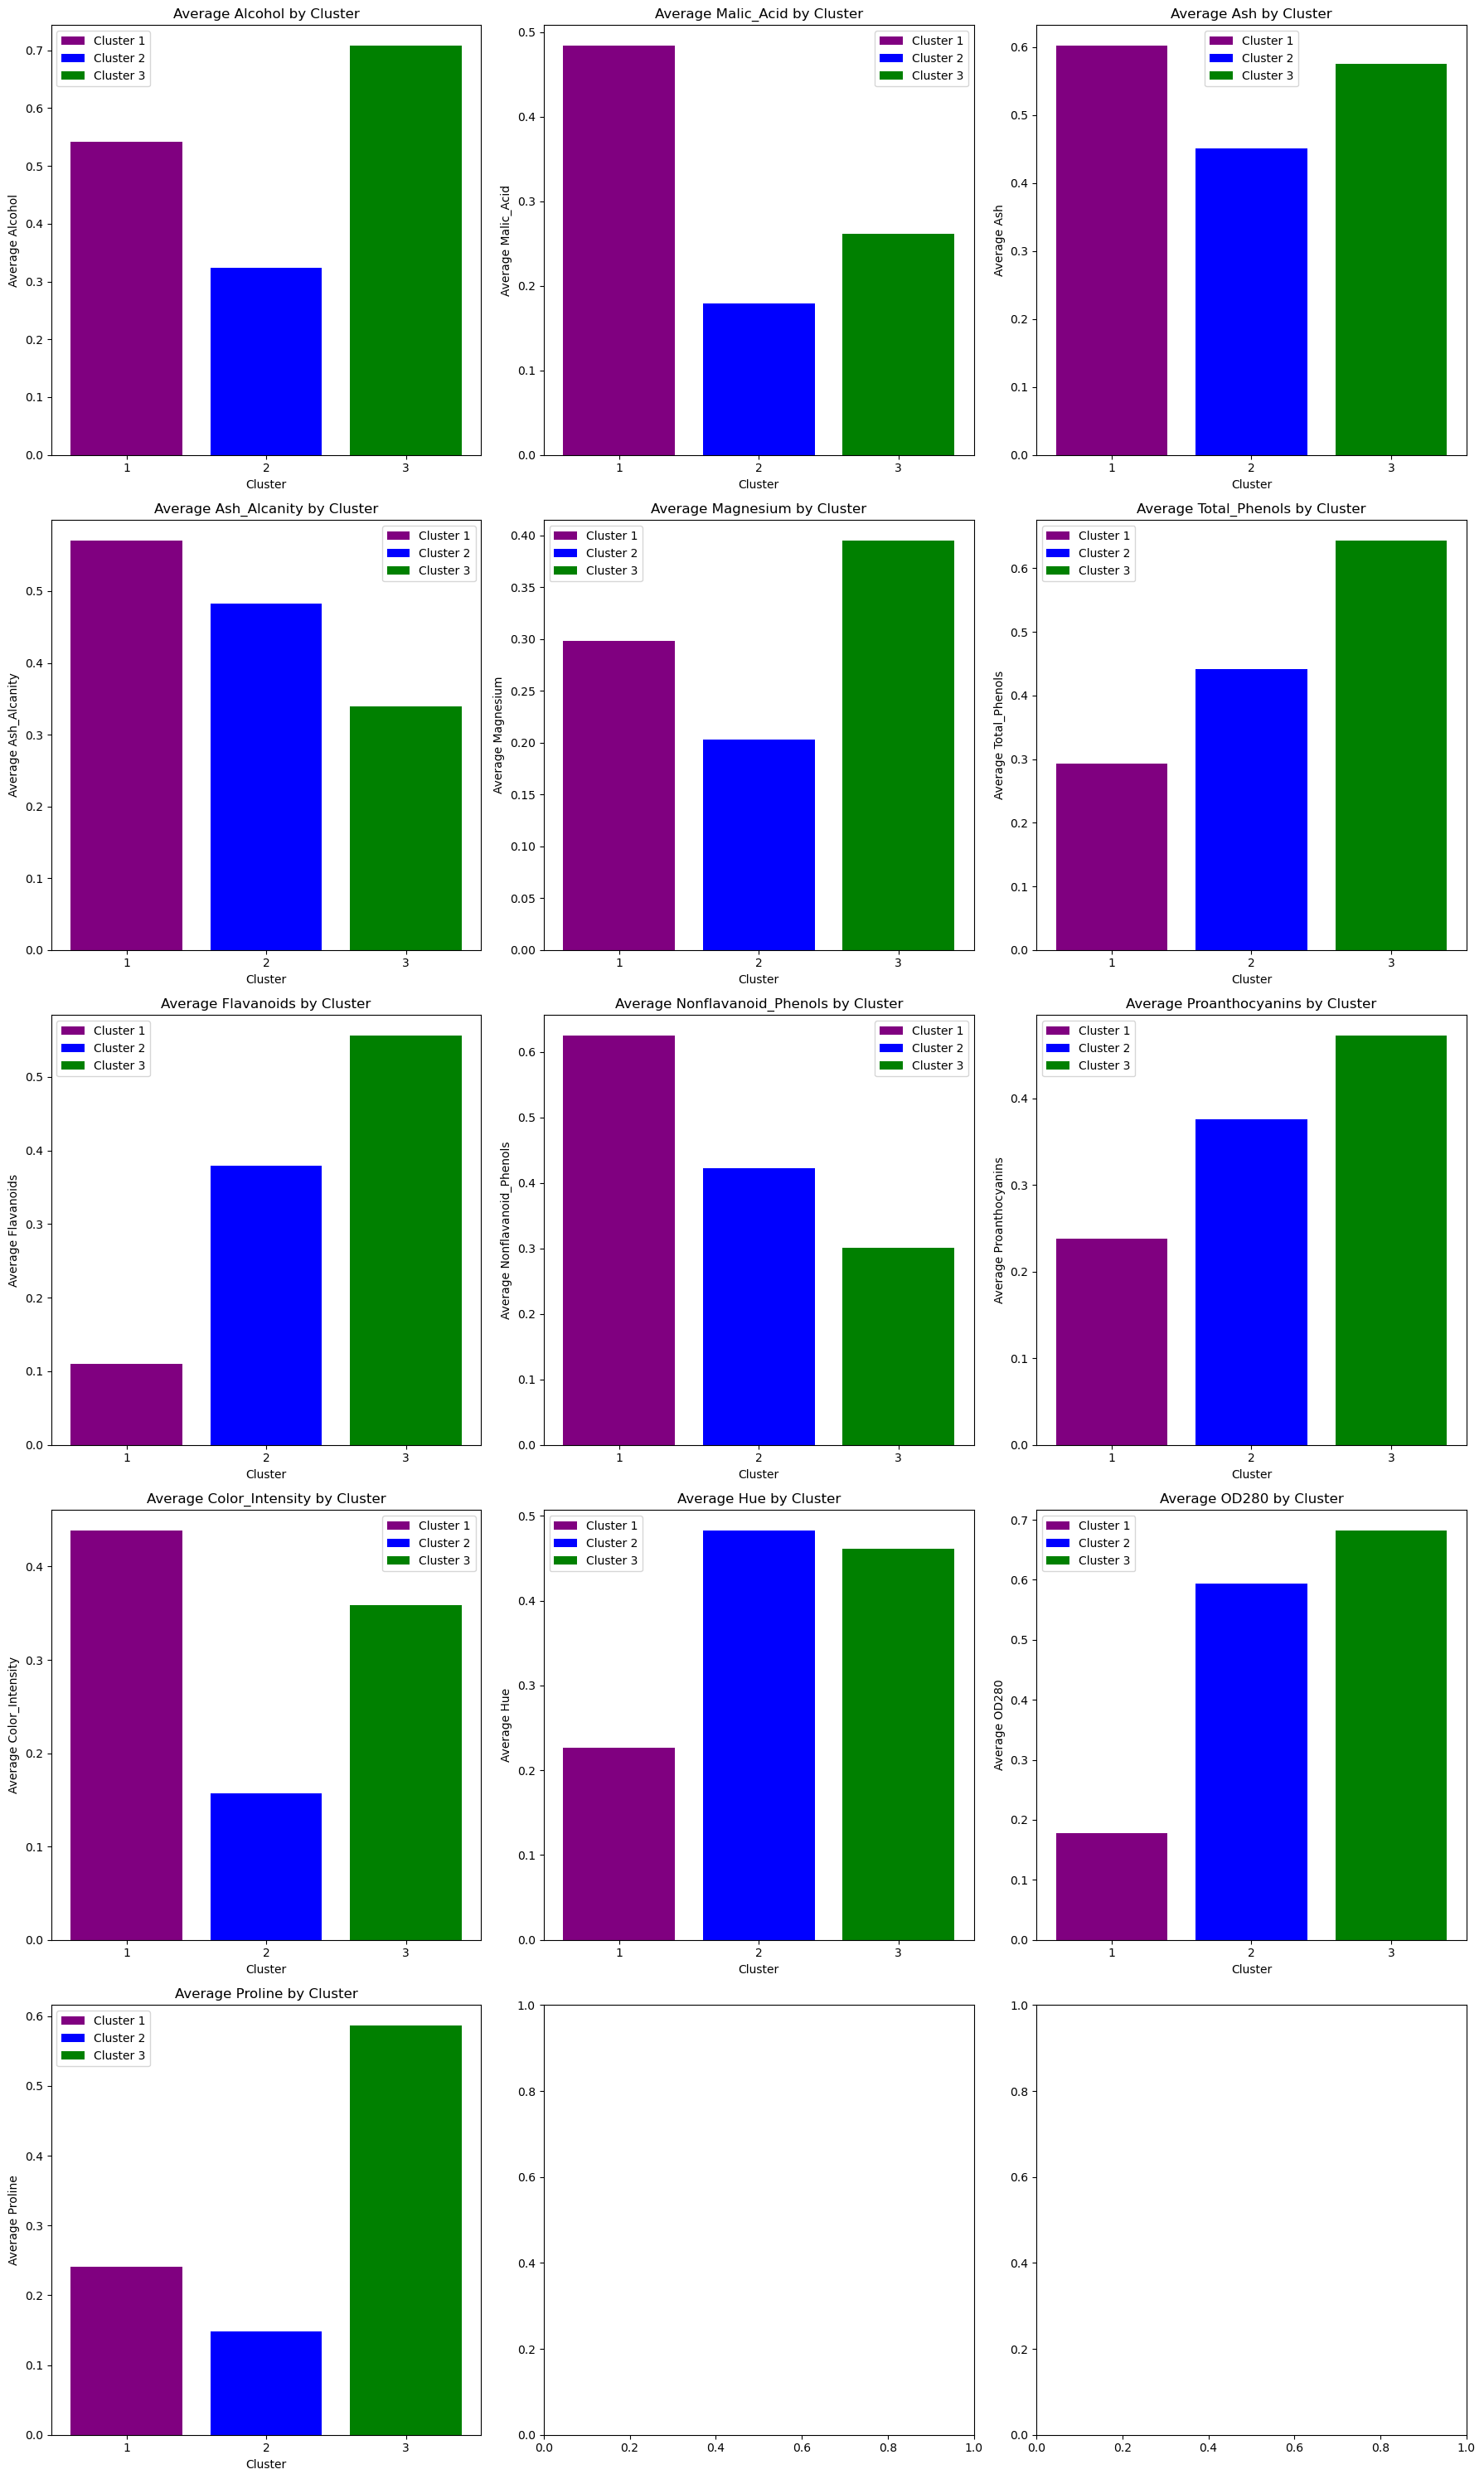

In [635]:
# Get unique clusters
clusters = all_data['cluster'].unique()

# Get the number of columns for subplots
num_columns = len(all_data.columns) - 1  # Excluding 'cluster' column
num_rows = -(-num_columns // 3)  # Ceiling division to get the number of rows needed

# colors
cluster_colors = {'Cluster 1': 'purple', 'Cluster 2': 'blue', 'Cluster 3': 'green'}

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6*num_rows))

# Flatten axes if only one row
if num_rows == 1:
    axes = [axes]

# Iterate over each column (excluding 'cluster') and create separate bar plots for each
for idx, column in enumerate(all_data.columns):
    if column != 'cluster':
        # Calculate subplot position
        row_idx = idx // 3
        col_idx = idx % 3
        
        # Iterate over each cluster
        for cluster in clusters:
            # Filter data for the current cluster
            cluster_data = all_data[all_data['cluster'] == cluster]
            
            # Calculate the average value of the current column within the cluster
            avg_value = cluster_data[column].mean()
            
            # Plot the average value for the current cluster
            axes[row_idx][col_idx].bar(cluster, avg_value, label=f'Cluster {cluster}', color=cluster_colors[f'Cluster {cluster}'])
        
        # Add labels and title for the subplot
        axes[row_idx][col_idx].set_xlabel('Cluster')
        axes[row_idx][col_idx].set_ylabel('Average ' + column)
        axes[row_idx][col_idx].set_title(f'Average {column} by Cluster')
        axes[row_idx][col_idx].legend()

# Adjust layout
plt.tight_layout()
# Show plots
plt.show()


<a id="id3"></a>


## 3. Conclusiones y Resultados Finales

## 4. Bibliografía

https://www.ttb.gov/regulated-commodities/beverage-alcohol/wine/labeling-wine/wine-labeling-alcohol-content

